In [5]:
using ContinuumWorld
using POMDPs
using Interact
value = Interact.value
using ProfileView
using GridInterpolations

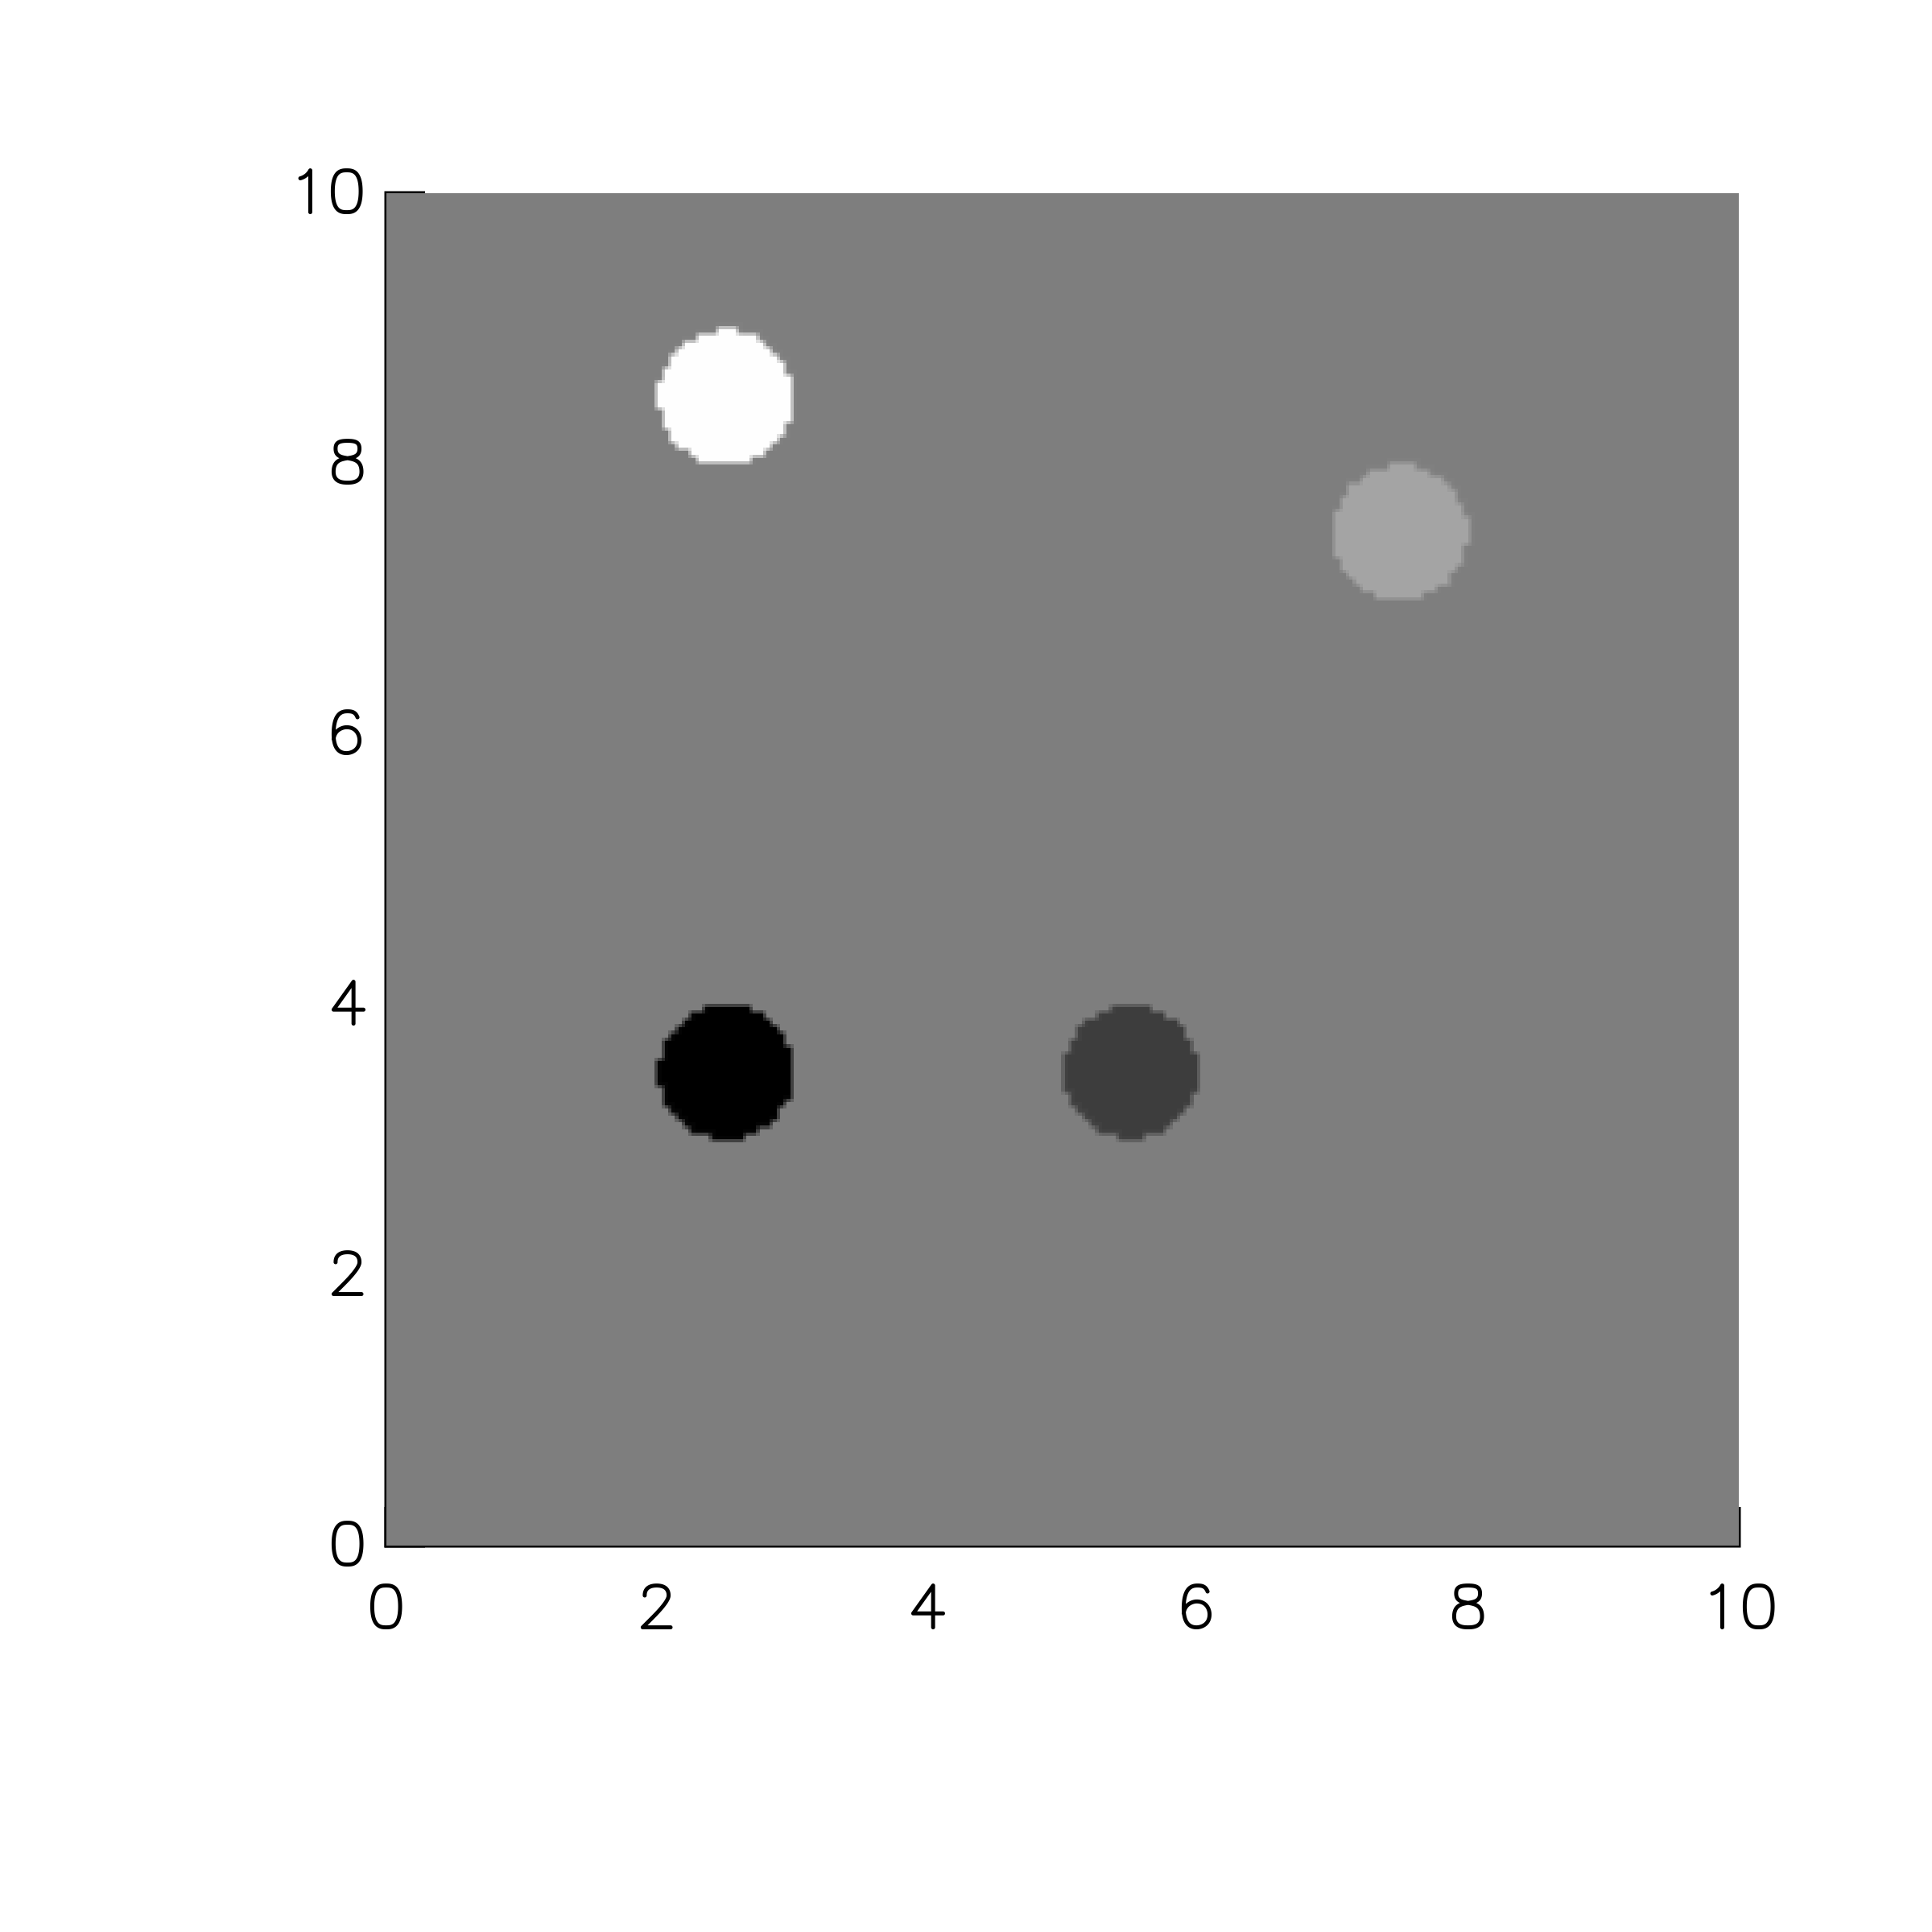

In [6]:
w = CWorld()

dummy_s = Vec2(0.0, 0.0)
dummy_a = Vec2(0.0, 0.0)
CWorldVis(w, f=sp->reward(w,dummy_s,dummy_a,sp))

In [7]:
nx = 30
ny = 30
grid = RectangleGrid(linspace(w.xlim..., nx), linspace(w.ylim..., ny))

sol = CWorldSolver(max_iters=50, m=50, grid=grid)

@time solve(sol, w)

finished iteration 50
  3.854551 seconds (37.93 M allocations: 2.329 GB, 6.91% gc time)


Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 25 Int64 ,"i",25,"25",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",42=>"42",29=>"29",8=>"8",20=>"20",14=>"14"…)),Any[],Any[],true,"horizontal")

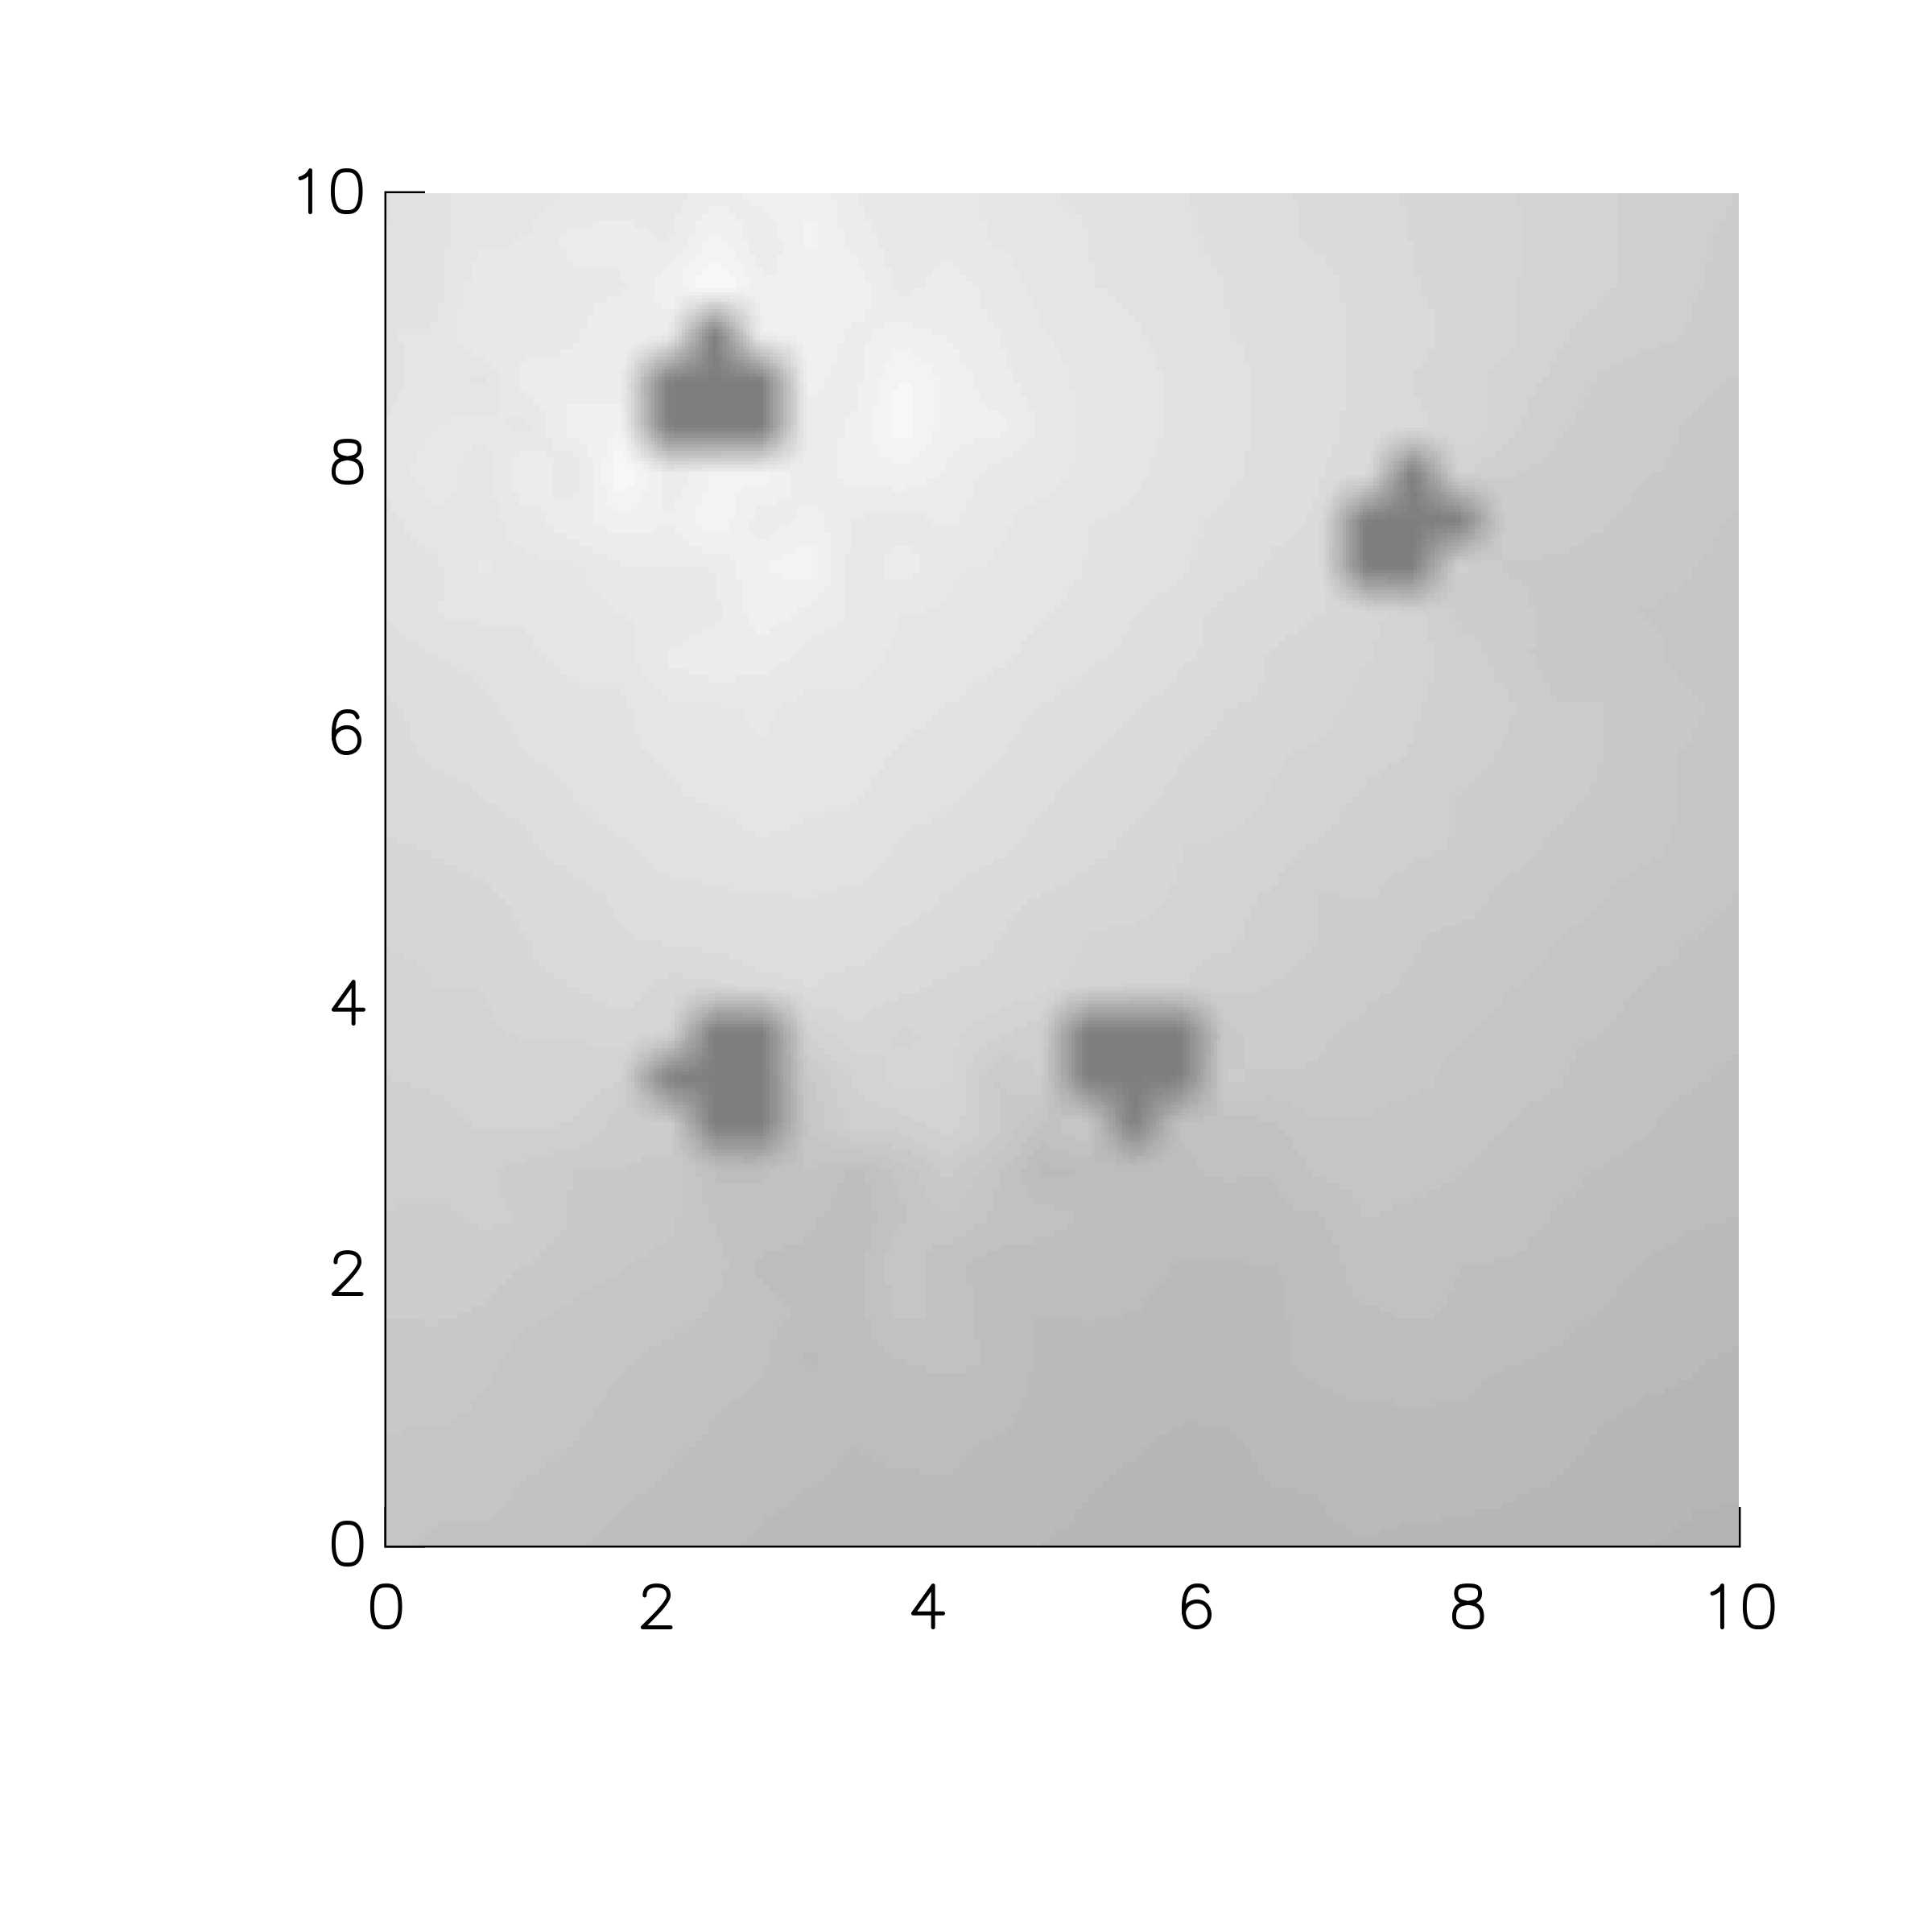

In [8]:
@manipulate for i in 1:length(sol.value_hist)
    v = sol.value_hist[i]
    CWorldVis(w, f=s->evaluate(v, s))
end